<a href="https://colab.research.google.com/github/JakeCode11/HW4/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **General Concepts**

**Artificial Intellgience:**



> Artificial intelligence (AI) is one of the research fields and theoretical applications of programming that has, in recent years, become a focal point of discussion. AI is a step up above former programming techniques as it proposes the idea that computers can perform more sophisticated and complex tasks.

> In essence, AI is the ability for a computer system to learn and perform tasks that normally require human intelligence. Such tasks include, but are not limited to, visual perception, speech recognition, decision-making, and translation between languages.

> On a foundational level, AI takes in an input and set of rules to compute an output.

**Machine Learning:**

> As the name implies, Machine Learning (ML) takes a similar, but also different, approach to how AI solves problems. ML algorithms or programs adjust themselves in response to new data that they are exposed to. Additionally, ML is more of a dynamic experience in which very limited human intervention is required to make specific changes during the developmental process.

> ML algorithms are fascinating in that they are able to modify themselves when exposed to more data during its lifetime. ML is different from AI in the sense that in its initialization, the algorithm is only aware of the input and output. The goal of the ML algorithm is to determine the rules or parameters to generate or determine the intended output from the given input.

### **Building a Model**


> When building a model, there are a number of variables and levels of understanding to consider to ensure that your output is the output you intended to find from analyzing a certain set of data.

> Some things to consider when building the model are the following:
*   Choosing a Measure of Success
*   Setting up an Evalutation Protocol
*   Preparing the data that you have chosen prior to training

> With these in mind, it makes it a more streamline experience and provides better structure to attempting to solve a novel problem within computer science.

> One very popular model that many computer scientists use frequently is linear regression. Linear regression in essence generates a 'line of best fit' for a series of data and utilizes that 'line' to predict the next outcome for a given arbitrary value. Below is an example of what a linear regression model looks like.











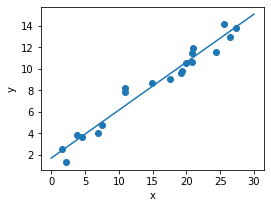

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('tight')
plt.show()

### **Compiling a Model**

> In the compilation process of a model, it is important to set up the model with the adequate parameters to run at the most optimized performance to yield accurate results for the intended dataset.

> The following code is a good outline from my Homework 3 that shows how to define the different parameters of a model to structure it to better produce the intended output during the validation phase of the algorithm.





In [0]:
learning_rate = 0.0002 
lr_decay = 0.0001
batch = 64
fcLayer1 = 32
dropout = 0.5

epochsL1 = 10
patiencel1 = 1
factorL1 = 0.5

epochsL2 = 10
patiencel2 = 1
factorL2 = 0.5

verbose_train = 1



> From the code above, each of these variables contributes to the overall structure of the model and affects how thoroughly, efficiently, and quickly the data will be computed through the model a programmer designed. As there are numerous types of models and approaches to structuring the models, these initial parameters in the compilation process are a very pivotal and important aspect to generating accurate ouput.



### **Training a Model**

> Training a model is one of the most important parts of the AI/ML developmental life cycle. It gives the programmer a chance to observe any significant changes when new, unknown data is put through the model they developed.

> In my experience in research and from this course, a good rule of thumb is taking the initial dataset given or provided and splitting it into two parts. The first part is what the programmer should train the model on to make sure it has an understanding of the type of input that it will process.  The second part is the testing set where the programmer will process the testing data into the model to see how it stands against new, randomized data.

> Once both the training and test data are processed, it is important for a programmer to observe the difference in accuracy between the two sets and if there is any significant loss over the number of epochs the programmer has set.

> One method of understanding the trained vs. test output is to develop a training and test loss graph that could show any overfitting or underfitting in the model.

> Overfitting occurs when a model learns the training data to the extent that it results in a negative performance on new data. On the other hand, underfitting refers to data that cannot model the training data or generalize any new data that is being processed. Below is an example of overfitting and underfitting from my HW2 assignment.












In [0]:
# Importing dependencies
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Loading the MNIST Fashion Data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocessing data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Setting up the 'Overfitting' model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128*4, activation=tf.nn.relu),
    keras.layers.Dense(10*4, activation=tf.nn.softmax)
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images,
                    train_labels,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
print("Test Accuracy:", test_acc)

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Setting up the 'Underfitting' model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dropout(0.75),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images,
                    train_labels,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)
print("Test Accuracy:", test_acc)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Finetuning a pretrained model**

When developing a training network, it is sometimes better to have a pretrained model to start off from rather than developing a network from scratch. The downside of developing a network from scratch, is that the programmer will need a rather large and expansive dataset to train their data on and a substantial amount of computing resources to be able to train the hypothetical data they use.

The benefits of using a pretrained model is that you can load the pre-trained data into your code, freeze any of the required layers to avoid training on those layers, and then create your own model for the data to train on.

Once the model is setup for training with the parameters you intend on using, you can now train your new model and check for the results to see how well your new model performed with the foundation of the pretrained model.
